# KMeans vs GMM on a Generated Dataset

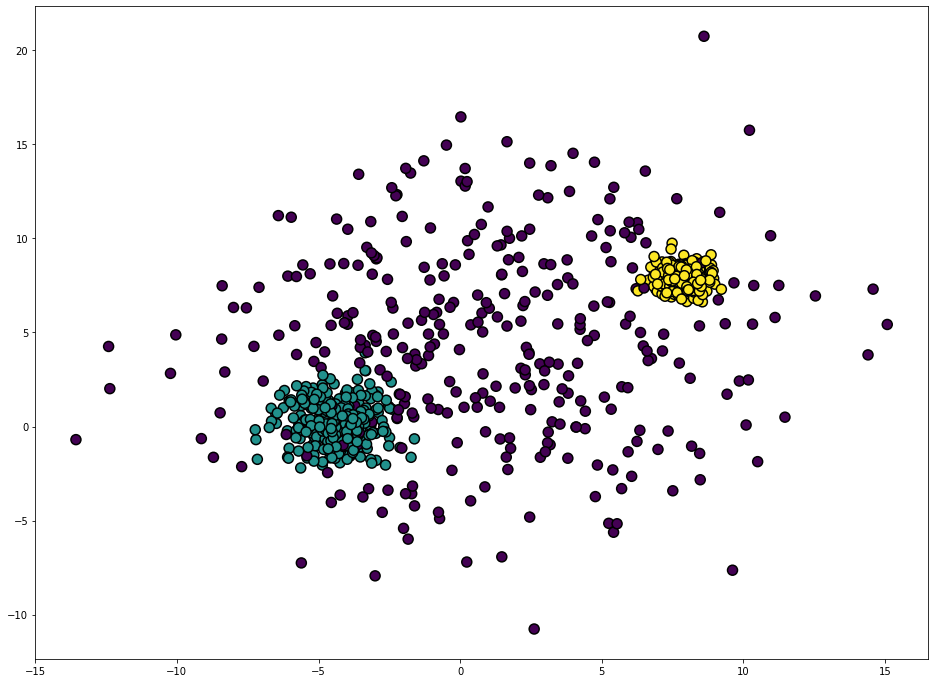

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture

%matplotlib inline

n_samples = 1000

varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[5, 1, 0.5],
                             random_state=3)
X, y = varied[0], varied[1]

plt.figure( figsize=(16,12))
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

In [2]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
pred = kmeans.fit_predict(X)

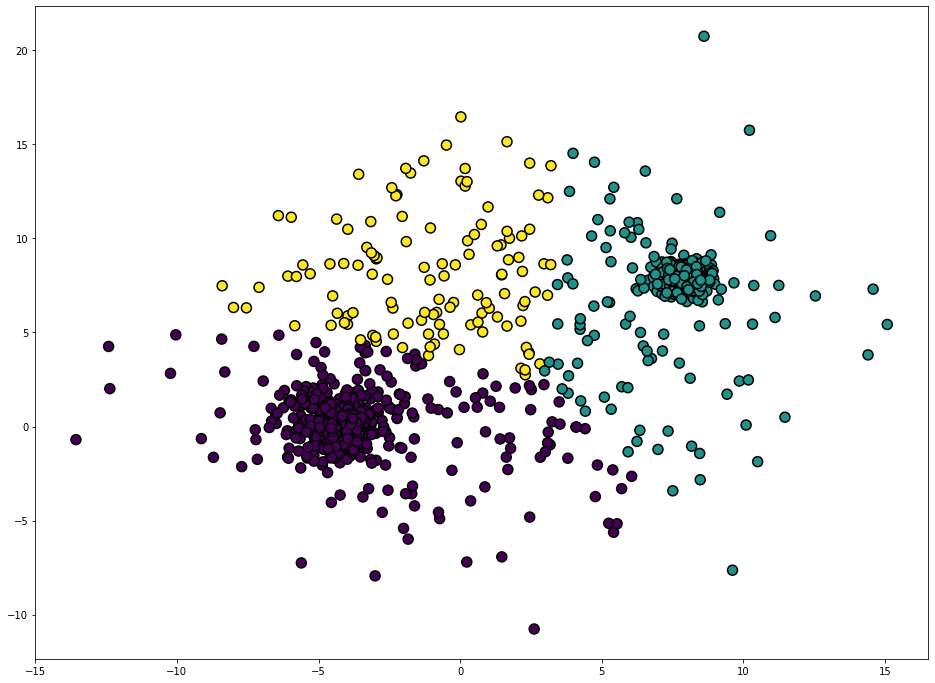

In [3]:
plt.figure( figsize=(16,12))
plt.scatter(X[:,0], X[:,1], c=pred, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

In [4]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)
gmm = gmm.fit(X)
pred_gmm = gmm.predict(X)

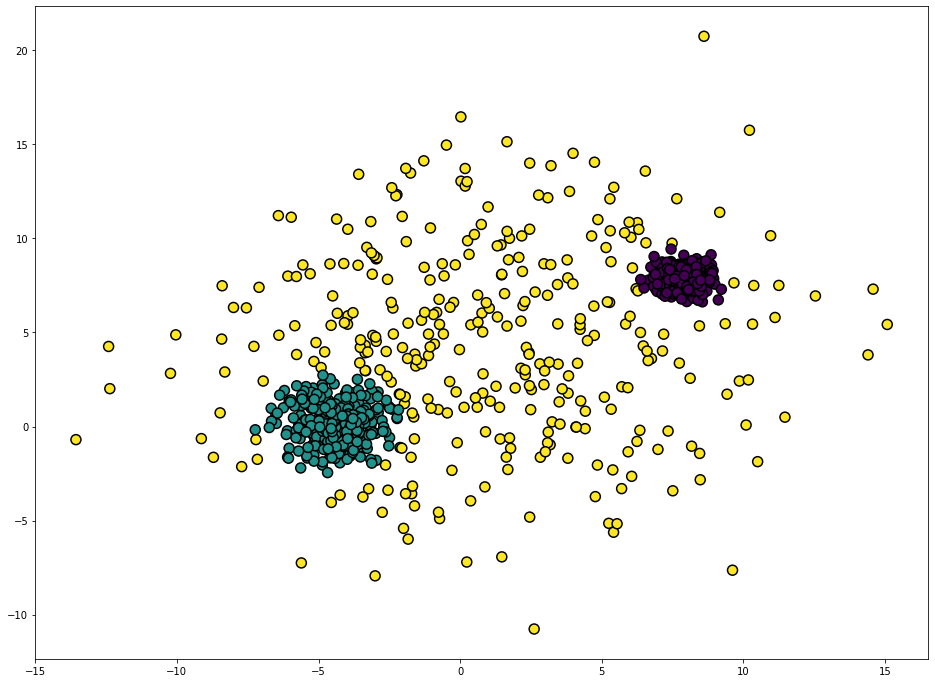

In [5]:
# Plot the clusters
plt.figure( figsize=(16,12))
plt.scatter(X[:,0], X[:,1], c=pred_gmm, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

# KMeans vs GMM on The Iris Dataset

In [6]:
import seaborn as sns

iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


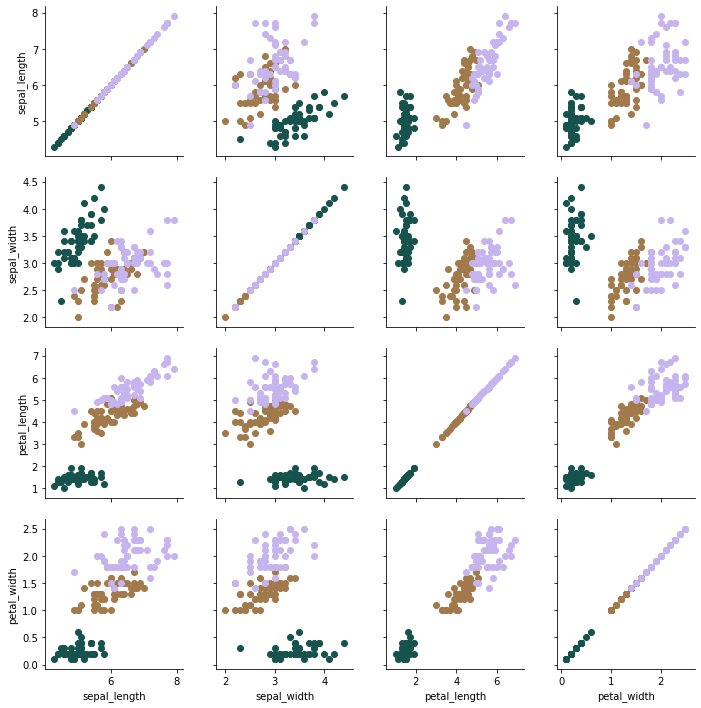

In [7]:
g = sns.PairGrid(iris, hue="species",
                 palette=sns.color_palette("cubehelix", 3),
                 vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

In [8]:
kmeans_iris = KMeans(n_clusters=3)
pred_kmeans_iris = kmeans_iris.fit_predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

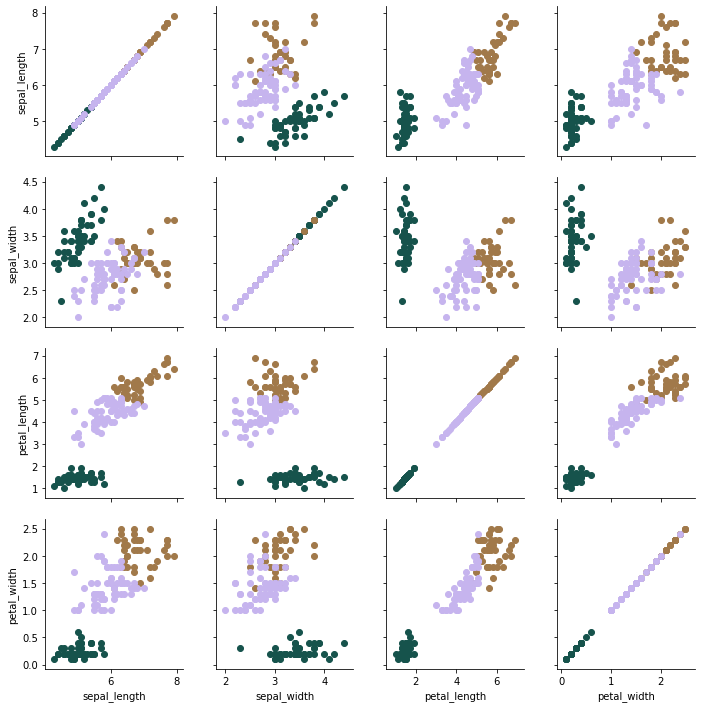

In [9]:
iris['kmeans_pred'] = pred_kmeans_iris

g = sns.PairGrid(iris,
                 hue="kmeans_pred",
                 palette=sns.color_palette("cubehelix", 3),
                 vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()

In [10]:
from sklearn.metrics import adjusted_rand_score

iris_kmeans_score = adjusted_rand_score(iris['species'], iris['kmeans_pred'])

# Print the score
iris_kmeans_score

0.7302382722834697

In [11]:
gmm_iris = GaussianMixture(n_components=3).fit(iris[['sepal_length','sepal_width','petal_length','petal_width']])
pred_gmm_iris = gmm_iris.predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

In [12]:
iris['gmm_pred'] = pred_gmm_iris
iris_gmm_score = adjusted_rand_score(iris['species'], iris['gmm_pred'])

# Print the score
iris_gmm_score

0.9038742317748124

### Thanks to ARI socres, we have a clear indicator which clustering result better matches the original dataset.